In [7]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import sklearn  
from sklearn.datasets import make_regression
from sklearn import linear_model, datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from tqdm import tqdm

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv("data/augmented_data.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.0
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.0
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.0
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.0
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.0


In [13]:
#Separate X and y data
X = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_size = df['Diameter_nm'].values #will predict diameter
y_abs = df['Absorbance max (nm)'].values #will predict absorbance
y_PL = df['PL max (nm)'].values #will predict PL

# Size prediction

In [14]:
#split dataset into train and test set
X_train, X_test, y_size_train, y_size_test = train_test_split(X, y_size, test_size=0.25, random_state=8, shuffle=True)

In [ ]:
for neighbors in np.arange (1, 100, 1):
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train,y_size_train)
    y_size_predict = knn.predict(X_test)
    MSE = mean_squared_error(y_size_test, y_size_predict)
    R2 = r2_score(y_size_test, y_size_predict)
    print("MSE", MSE, "R2", R2)    


In [36]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_size_train)
y_size_predict = knn.predict(X_test)
MSE = mean_squared_error(y_size_test, y_size_predict)
R2 = r2_score(y_size_test, y_size_predict)

print("MSE", MSE, "R2", R2)

MSE 0.6989643801694915 R2 0.6139151743393838


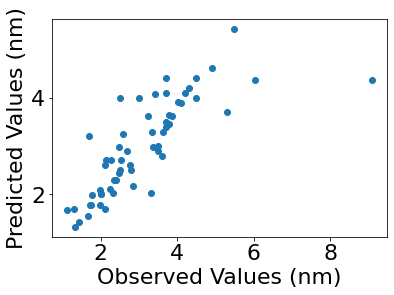

In [34]:
plt.figure()
plt.title("")
plt.plot(y_size_test, y_size_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# Abs prediction

In [17]:
#split dataset into train and test set
X_train, X_test, y_abs_train, y_abs_test = train_test_split(X, y_abs, test_size=0.25, random_state=8, shuffle=True)

In [45]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_abs_train)
y_abs_predict = knn.predict(X_test)
MSE = mean_squared_error(y_abs_test, y_abs_predict)
R2 = r2_score(y_abs_test, y_abs_predict)

print("MSE", MSE, "R2", R2)

MSE 1261.5064406779659 R2 0.7534550122256516


In [ ]:
for neighbors in np.arange (1, 100, 1):
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train,y_abs_train)
    y_abs_predict = knn.predict(X_test)
    MSE = mean_squared_error(y_abs_test, y_abs_predict)
    R2 = r2_score(y_abs_test, y_abs_predict)
    print("MSE", MSE, "R2", R2)    


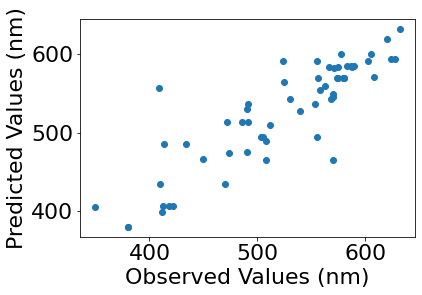

In [46]:
plt.figure()
plt.title("")
plt.plot(y_abs_test, y_abs_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# PL prediction

In [19]:
#split dataset into train and test set
X_train, X_test, y_PL_train, y_PL_test = train_test_split(X, y_PL, test_size=0.25, random_state=8, shuffle=True)

In [59]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_PL_train)
y_PL_predict = knn.predict(X_test)
MSE = mean_squared_error(y_PL_test, y_PL_predict)
R2 = r2_score(y_PL_test, y_PL_predict)

print("MSE", MSE, "R2", R2)

MSE 1091.4261501651333 R2 0.37630465115105294


In [ ]:
for neighbors in np.arange (1, 100, 1):
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train,y_PL_train)
    y_PL_predict = knn.predict(X_test)
    MSE = mean_squared_error(y_PL_test, y_PL_predict)
    R2 = r2_score(y_PL_test, y_PL_predict)
    print("MSE", MSE, "R2", R2)    
